# Análise dos Dados do Booking - *Portugal*

- Baixe o arquivo no link: [Clique aqui para baixar o arquivo](https://drive.google.com/file/d/1ApHNm3gI7O7j7Kby7EU9xZo7W1E8xB6t/view?usp=drive_link)



# A [Booking.com](https://www.booking.com/) é uma das **maiores plataformas de reservas de hospedagem do mundo**. E o mais impressionante? Ela **não é dona de nenhum hotel**!

Conectando viajantes a uma vasta rede de hotéis, pousadas, apartamentos e outras opções de hospedagem, a Booking.com revolucionou a forma como as pessoas planejam suas viagens, oferecendo **milhões de propriedades em todo o mundo**.

Fundada em 1996, a empresa já ajudou **milhões de viajantes** a encontrar a hospedagem perfeita, desbancando métodos tradicionais de reserva e se tornando referência no setor de turismo.

A Booking.com também disponibiliza dados e ferramentas para desenvolvedores através da [Booking.com API](https://developers.booking.com/), permitindo a integração de suas soluções de hospedagem em outros aplicativos e plataformas.

<center>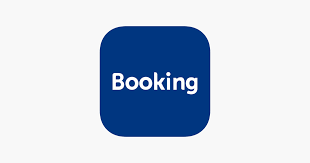</center>

**Neste *notebook*, vamos explorar dados de hospedagens em Lisboa e descobrir insights valiosos sobre tendências de viagem, preços e disponibilidade.**

**Dicionário das variáveis**

* **id** : identificação única para o anúncio
* **name** : nome do anúncio
* **host_id** : identificador único para o proprietário do imóvel
* **host_name** : nome do proprietário
* **neighbourhood_group** :município ao qual o imóvel pertence, geolocalizado pelas coordenadas de latitude e longitude
* **neighbourhood** : bairro da propriedade
* **latitude** : coordenada geográfica de latitude da propriedade
* **longitude** : coordenada geográfica de longitude da propriedade
* **room_type** : tipo de quarto oferecido para locação
* **price** : preço da diária do aluguel
* **minimum_nights** : quantidade mínima de noites para alugar o imóvel
* **number_of_reviews** : quantidade de avaliações que o imóvel tem
* **last_review** : data da última avaliação
* **reviews_per_month** : quantidade de avaliações por mês
* **calculated_host_listings_count** : quantidade de imóveis do mesmo proprietário na mesma cidade/região
* **availability_365** : número de dias disponíveis para locação nos próximos 365 dias
* **number_of_reviews_ltm** : quantidade de avaliações nos últimos 12 meses
* **license** : número de registro do imóvel

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/DataScience"

Mounted at /content/drive


In [9]:
df = pd.read_csv(path + '/booking_portugal.csv', sep=',')

df.info()

# mostrar as 5 primeiras entradas
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18929 entries, 0 to 18928
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18929 non-null  int64  
 1   name                            18921 non-null  object 
 2   host_id                         18929 non-null  int64  
 3   host_name                       18929 non-null  object 
 4   neighbourhood_group             18929 non-null  object 
 5   neighbourhood                   18929 non-null  object 
 6   latitude                        18929 non-null  float64
 7   longitude                       18929 non-null  float64
 8   room_type                       18929 non-null  object 
 9   price                           18929 non-null  int64  
 10  minimum_nights                  18929 non-null  int64  
 11  number_of_reviews               18929 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,50633912,Dawn by Tejo apartment,162544509,Rita,Lisboa,Misericrdia,38.68451,-9.14721,Entire home/apt,140,6,9,2022-05-12,0.94,2,48,9,117958/AL
1,26228173,"Double or single room in Cacilhas, Almada.",190814174,Expandavenue,Lisboa,Misericrdia,38.68663,-9.14882,Private room,25,3,52,2022-05-31,1.08,10,169,9,nº 73403/AL
2,626948758397201007,Private Bedroom | Short Board | AtelierSurf29,401590803,Alain,Lisboa,Estrela,38.67714,-9.15887,Private room,34,3,4,2022-06-08,4.00,4,339,4,125224/AL
3,50739035,"Comfortable, Fully Equipped and Home-office Ready",46289990,Daniel,Lisboa,Estrela,38.67610,-9.16045,Entire home/apt,65,2,15,2022-04-30,1.60,1,54,15,118900/AL
4,27597765,Cacilhas AMAZING view of Lisbon+ beaches Caparica,8595303,Gina,Lisboa,Estrela,38.68435,-9.15006,Entire home/apt,82,3,4,2018-10-01,0.09,3,306,0,80019/AL


In [10]:
df.shape

(18929, 18)

In [11]:
# Descrição estatística dos dados
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.892900e+04,1.892900e+04,18929.000000,18929.000000,18929.000000,18929.000000,18929.000000,16495.000000,18929.000000,18929.000000,18929.000000
mean,5.972928e+16,1.275861e+08,38.762473,-9.208912,133.735908,4.255692,51.760737,1.335881,14.965661,196.229595,11.739817
std,1.799580e+17,1.340661e+08,0.115862,0.115126,265.123753,19.846961,79.428109,1.436713,37.261586,115.172929,18.484858
min,6.499000e+03,1.445500e+04,38.661270,-9.498520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.614731e+07,1.681903e+07,38.710770,-9.297790,62.000000,1.000000,3.000000,0.340000,1.000000,100.000000,0.000000
50%,2.862440e+07,7.415772e+07,38.717370,-9.147350,94.000000,2.000000,18.000000,0.940000,4.000000,224.000000,5.000000
75%,4.532870e+07,2.047378e+08,38.742960,-9.134910,148.000000,3.000000,66.000000,1.950000,12.000000,296.000000,16.000000
max,6.454518e+17,4.632359e+08,39.333706,-8.794720,9999.000000,1000.000000,1833.000000,65.480000,274.000000,365.000000,989.000000


## Análise dos Dados


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**


In [12]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
# verificar os tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 18929 entradas (registros) e 18 atributos (variáveis).

Os tipos dos atributos são do tipo:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [13]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
reviews_per_month,12.858577
last_review,12.858577
license,7.750013
name,0.042263
id,0.000000
host_id,0.000000
latitude,0.000000
host_name,0.000000
neighbourhood_group,0.000000
neighbourhood,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

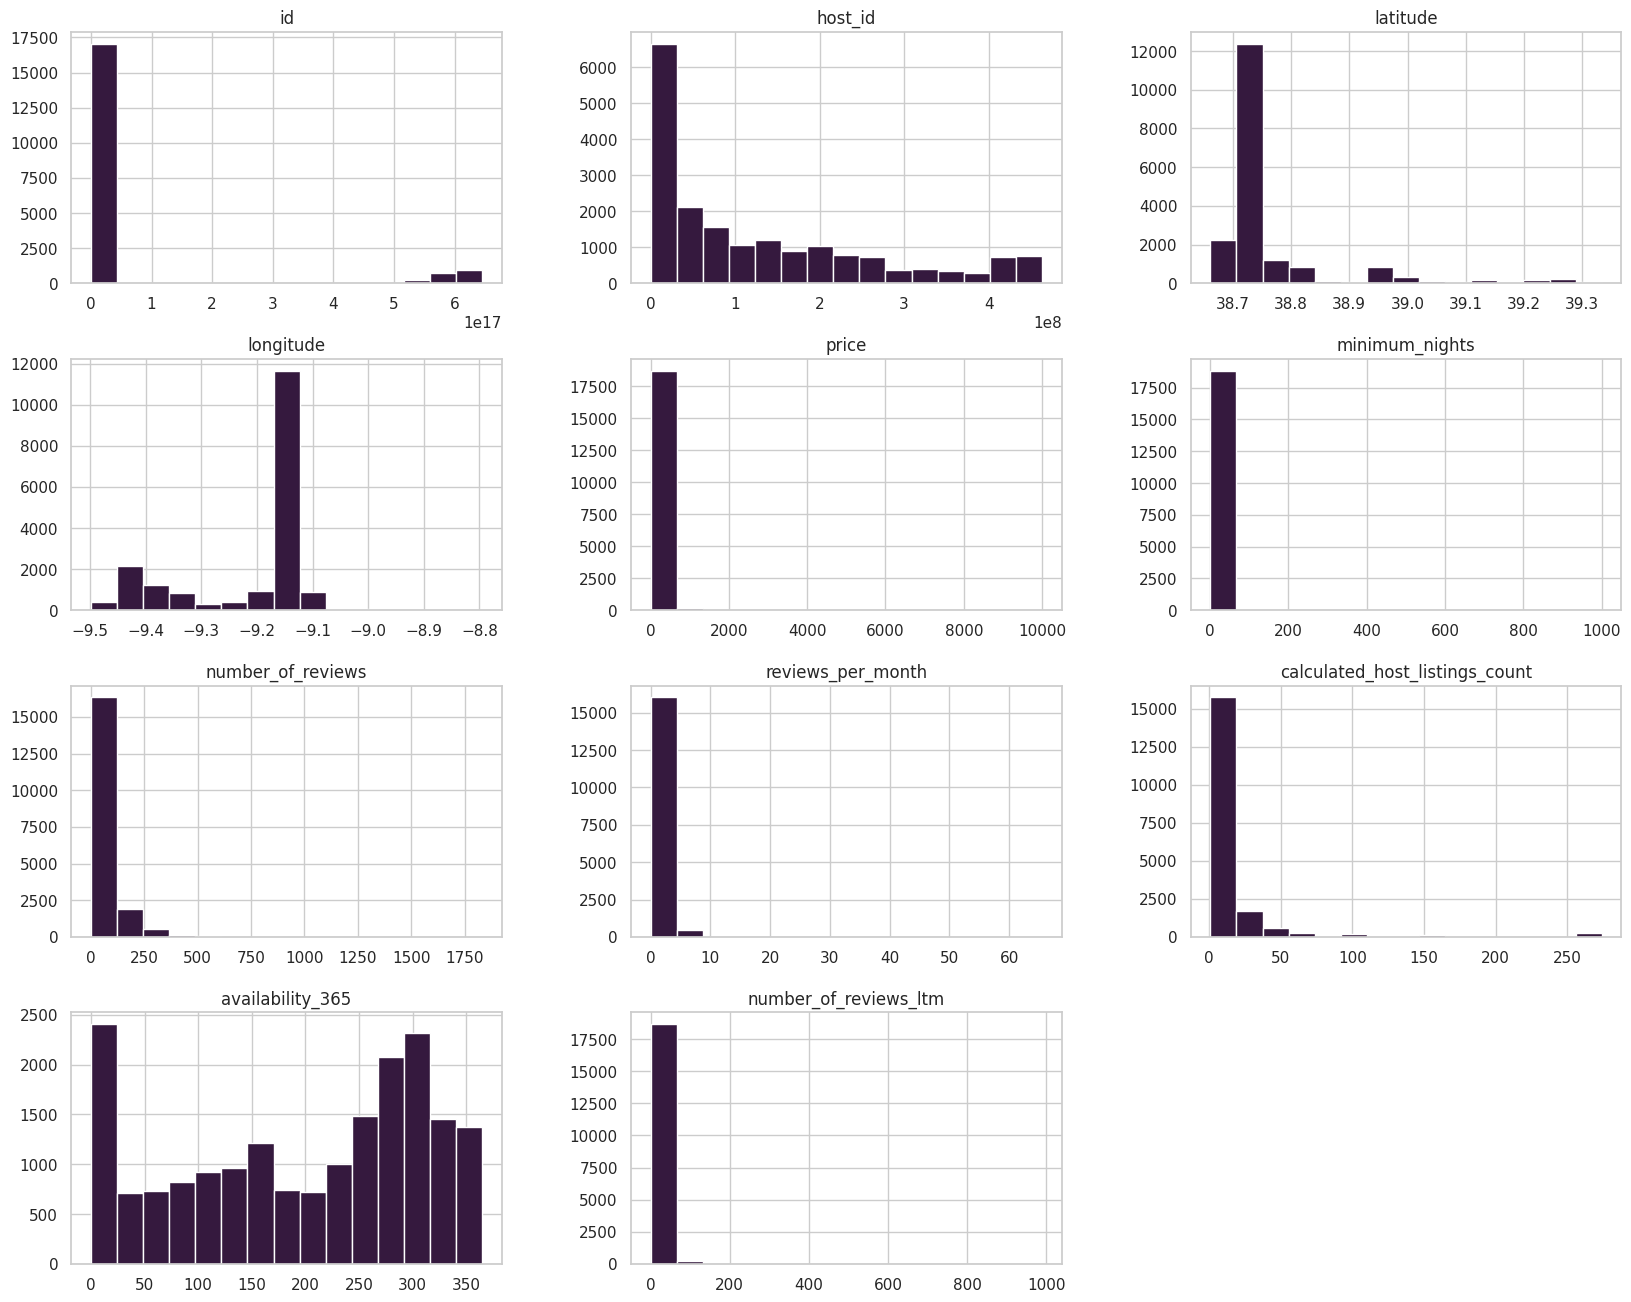

In [ ]:
df.hist(bins=15, figsize=(20,16));

### **Q4. Qual a média dos preços de aluguel?**
- 133.735908

In [15]:
media_p = df['price'].mean()
print(f'A media dos precos eh {media_p:.2f}')

A media dos precos eh 133.74


A média acima considera todos os tipos de quartos.

Se agruparmos por tipo de quarto podemos ver que os quartos privados possuem a menor média de preços e o maior preço de aluguel é para os quartos de hotel.

In [16]:
preco_medio = df.groupby('room_type').price.mean()
print(f'Média de preços de aluguel em Lisboa por tipo de quarto. Valores em Euros (€)\n{preco_medio}')

Média de preços de aluguel em Lisboa por tipo de quarto. Valores em Euros (€)
room_type
Entire home/apt    147.994616
Hotel room         216.278626
Private room        77.758985
Shared room        106.365000
Name: price, dtype: float64


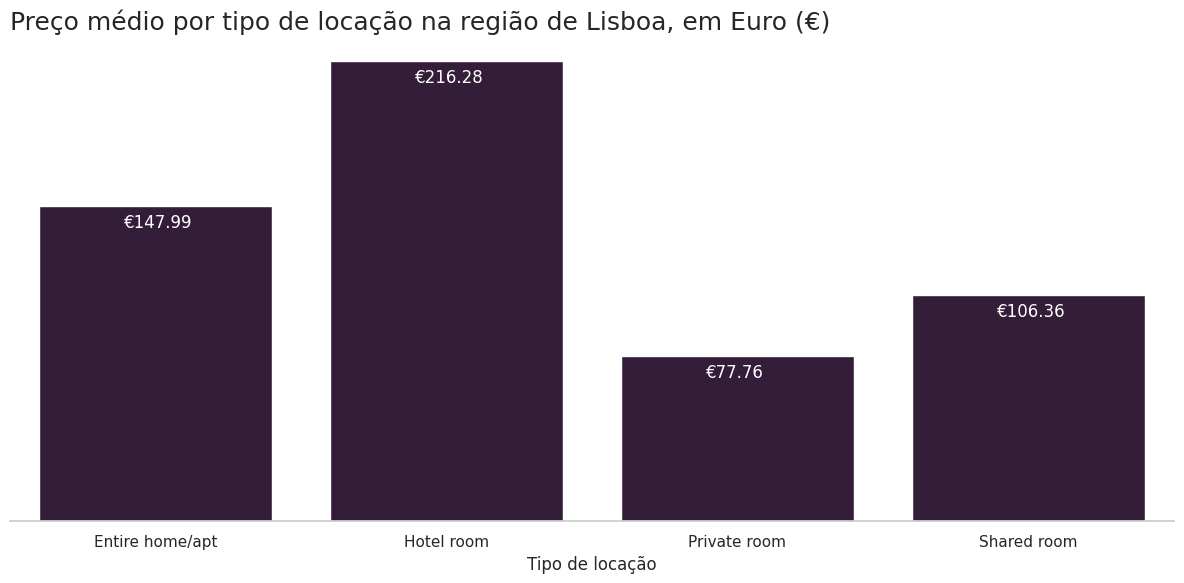

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=preco_medio.index, y=preco_medio.values)
ax.set_title('Preço médio por tipo de locação na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('Tipo de locação')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(preco_medio.values.shape[0]):
  ax.text(i-.11, preco_medio.values[i]-10, f'€{round(preco_medio.values[i], 2)}', fontsize=12, color='white')

plt.tight_layout()

### **Q5. Qual o tipo de imóvel mais disponível no Booking?**




In [34]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(f'Imóveis disponíveis por categoria:')
df.room_type.value_counts()

Imóveis disponíveis por categoria:


,count
room_type,
Entire home/apt,14488
Private room,3979
Hotel room,262
Shared room,200


In [35]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(f'Em porcentagem (%), esses dados representam:')
df.room_type.value_counts()/df.shape[0]*100

Em porcentagem (%), esses dados representam:


,count
room_type,
Entire home/apt,76.538644
Private room,21.020656
Hotel room,1.384120
Shared room,1.056580


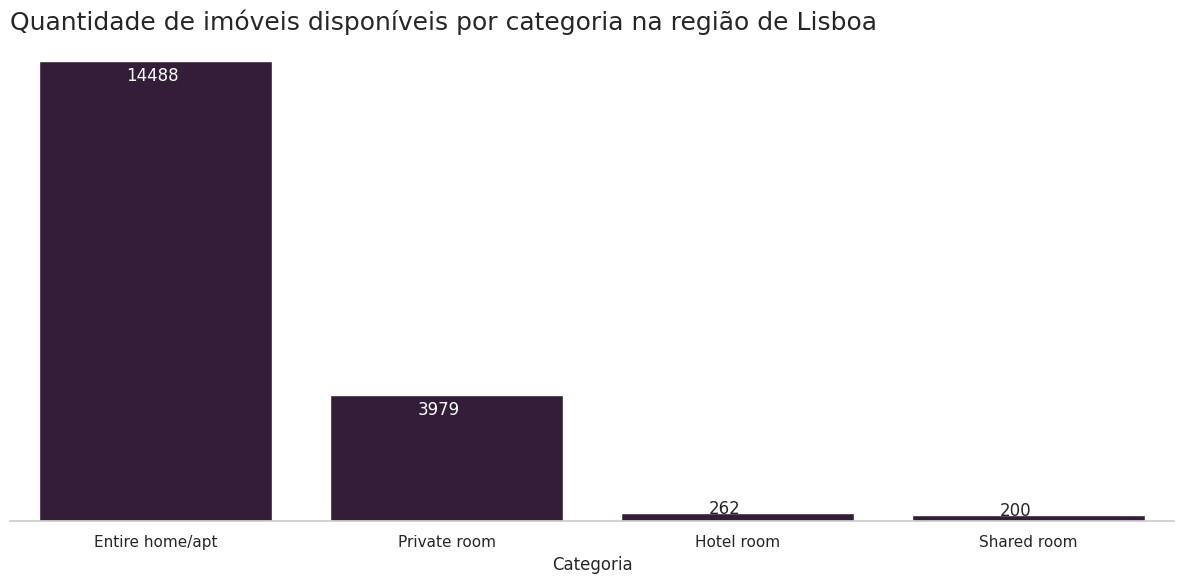

In [36]:
qt_room = df.room_type.value_counts()

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=qt_room.index, y=qt_room.values)

ax.set_title('Quantidade de imóveis disponíveis por categoria na região de Lisboa', loc='left', fontsize=18)
ax.set_xlabel('Categoria')
#ax.set_ylabel('Quantidade')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(qt_room.values.shape[0]-2):
  ax.text(i-.1, qt_room.values[i]-600, f'{round(qt_room.values[i], 2)}', fontsize=12, color='white')
for i in range(2, qt_room.values.shape[0]):
  ax.text(i-.1, qt_room.values[i], f'{round(qt_room.values[i], 2)}', fontsize=12)

plt.tight_layout()

Mais de 76% dos imóveis disponíveis são casas ou apartamentos completo.

A quantidade de quartos em hoteis ou quartos compartilhados não representa nem 2.5% de todas as opções disponíveis em Lisboa.

### **Q6. Qual a localidade mais cara?**



In [37]:
print(f'Existem {df.neighbourhood_group.unique().shape[0]} municíios registrados na região metropolitana de Lisboa no dataset.')


Existem 16 municíios registrados na região metropolitana de Lisboa no dataset.


In [38]:
# ver preços por municípios, na média
df.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

,price
neighbourhood_group,
Sintra,185.857372
Cascais,172.175369
Mafra,138.323207
Azambuja,135.423077
Sobral De Monte Agrao,129.000000
Lourinh,128.264151
Torres Vedras,128.126582
Lisboa,126.256366
Arruda Dos Vinhos,125.125000


In [39]:
# Quantidade de dados das cidades mais caras
print(df.query('neighbourhood_group == "Sintra"').shape[0])
print(df.query('neighbourhood_group == "Cascais"').shape[0])

1248
1762


In [24]:
print(f'Existem {df.neighbourhood_group.unique().shape[0]} municíios registrados na região metropolitana de Lisboa no dataset.')


Existem 16 municíios registrados na região metropolitana de Lisboa no dataset.


Na média, a cidade mais cara na região de Lisboa é Sintra. E a mais barata é Amadora.



In [25]:
# ver preços por municípios, na média
df.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

,price
neighbourhood_group,
Sintra,185.857372
Cascais,172.175369
Mafra,138.323207
Azambuja,135.423077
Sobral De Monte Agrao,129.000000
Lourinh,128.264151
Torres Vedras,128.126582
Lisboa,126.256366
Arruda Dos Vinhos,125.125000


In [43]:
# Quantidade de dados das cidades mais caras
print(df.query('neighbourhood_group == "Sintra"').shape[0])
print(df.query('neighbourhood_group == "Cascais"').shape[0])

1248
1762


In [42]:
# Quantidade de dados das cidades mais baratas
print(df.query('neighbourhood_group == "Amadora"').shape[0])
print(df.query('neighbourhood_group == "Odivelas"').shape[0])

117
64


<ipython-input-44-306efd291acd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=preco_por_regiao.index, x=preco_por_regiao.values, orient='h', palette='rocket')


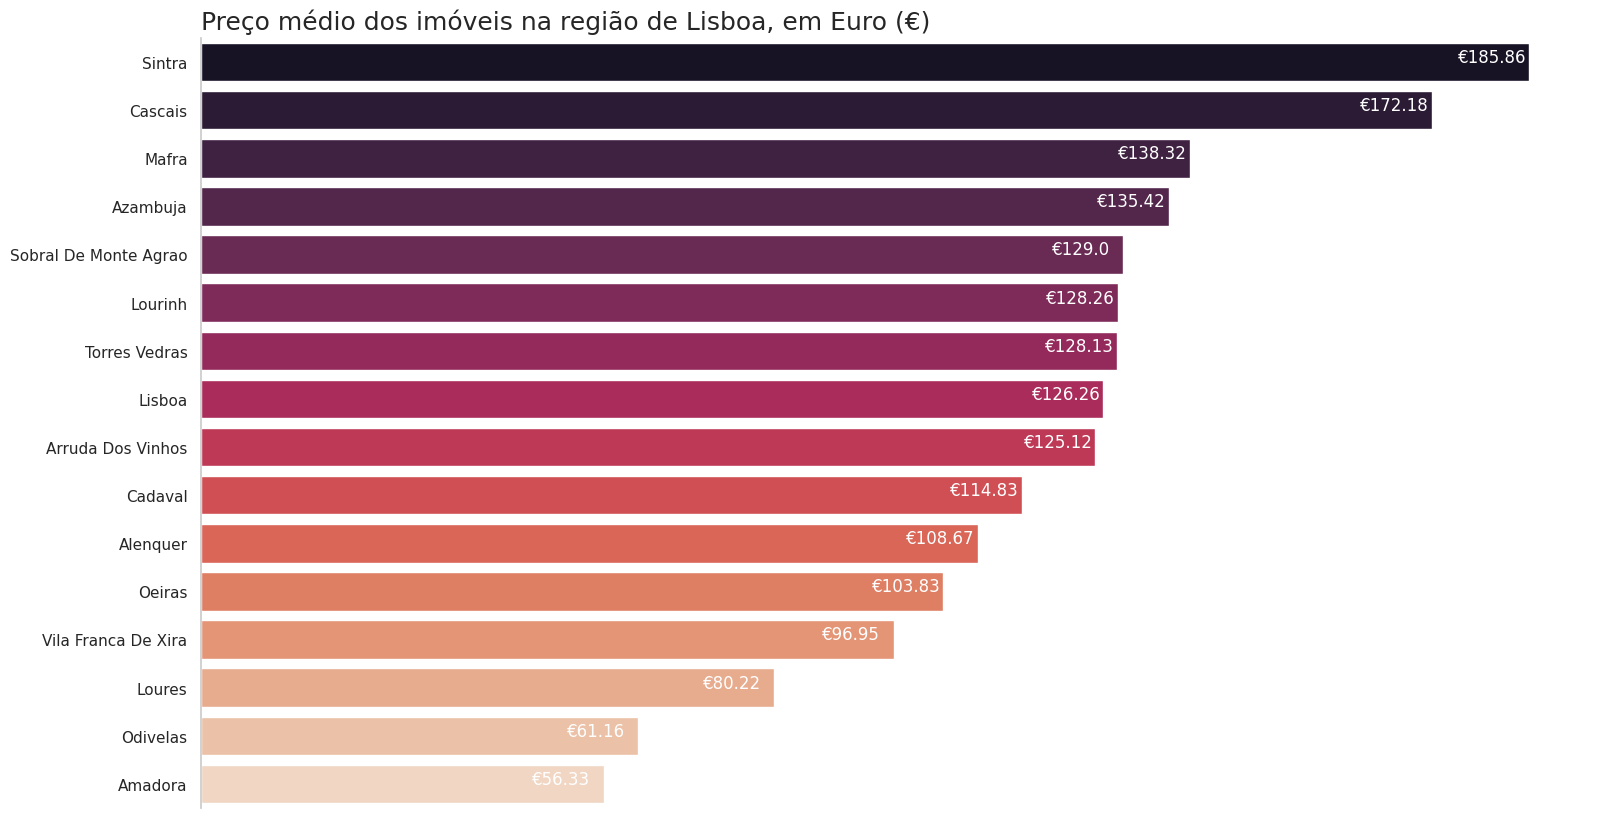

In [44]:
preco_por_regiao = df.groupby('neighbourhood_group').price.mean().sort_values(ascending=False)

fi, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(y=preco_por_regiao.index, x=preco_por_regiao.values, orient='h', palette='rocket')

ax.set_title('Preço médio dos imóveis na região de Lisboa, em Euro (€)', loc='left', fontsize=18)
ax.set_ylabel('')
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelbottom = False)
ax.grid(False)

#plt.xticks(rotation=45)
for i in range(preco_por_regiao.values.shape[0]):
  ax.text(preco_por_regiao.values[i]-10, i, f'€{round(preco_por_regiao.values[i], 2)}', fontsize=12, color='white')

plt.show()

Sintra é a cidade mais cara na região metropolitana de Lisboa para alugar um cômodo pelo Airbnb.

A cidade de Lisboa, que é capital de Portugal e da região metropolitana, é a maior do país e fica na 8ª posição das mas caras do Airbnb.

Será???

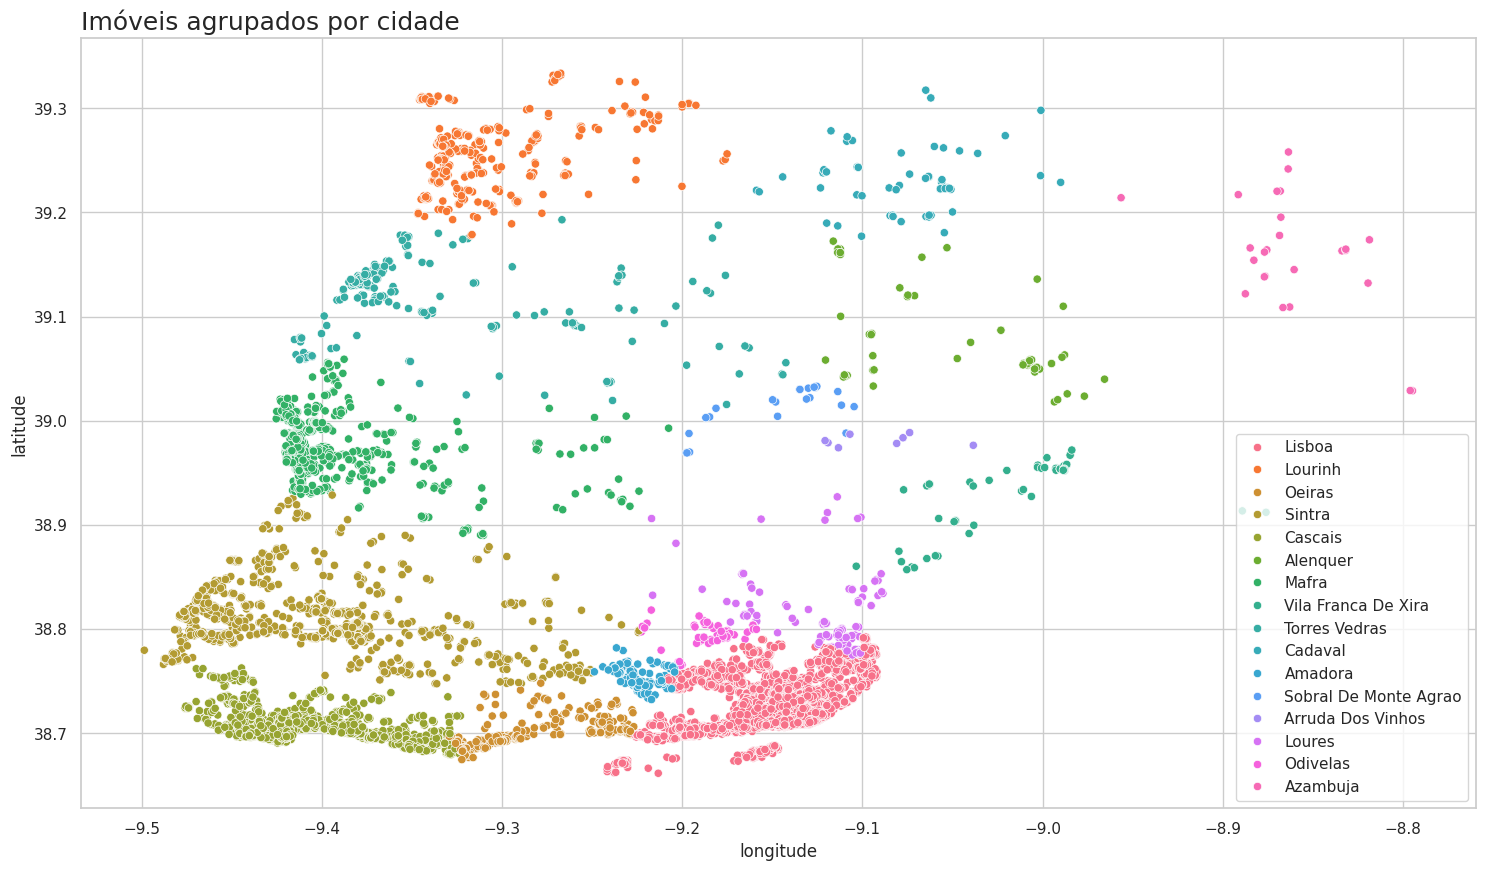

In [45]:
# plotar os imóveis pela latitude-longitude
plt.figure(figsize=(18,10))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', legend=True)
plt.title('Imóveis agrupados por cidade', loc='left', fontsize=18)
plt.legend(loc='best')
plt.show()

O aluguel mais caro nos dados é de €9999. Vamos ver as informações desse imóvel para análise mais detalhada:

Diária de €9999 em um hostel com quarto compartilhado na terceira cidade mais cara da região de Lisboa. Não há comentários do imóvel. O Host possui 10 imóveis cadastrados.

In [30]:
# Aluguel mais caro de €9999
df[df.price == 9999]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
15782,51337241,Habitación cuádruple en baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.00376,-9.41837,Shared room,9999,1,0,NaN,NaN,10,160,0,55201/AL


Olhando as informações do host pode ser percebido que os dados são do mesmo hostel e a média de valores é bem baixa. Logo, o valor da diária deve ter sido cadastrado errado. Há também um outro quarto com valor discrepante que também deve ter sido cadastrado errado.

In [31]:
df[df.host_id == 415595835]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
15748,51318536,Doble matrimonial con Balcón y vistas al mar,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003130,-9.416520,Private room,83,1,0,NaN,NaN,10,329,0,55201/AL
15749,51318580,Doble matrimonial baño en suite planta baja,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.001700,-9.418200,Private room,73,1,1,2022-04-16,0.54,10,300,1,55201/AL
15758,51322746,Habitación Triple básica baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.001440,-9.418550,Private room,99,1,0,NaN,NaN,10,160,0,55201/AL
15782,51337241,Habitación cuádruple en baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003760,-9.418370,Shared room,9999,1,0,NaN,NaN,10,160,0,55201/AL
15783,51338083,Cama en habitación triple,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003370,-9.417320,Shared room,29,1,0,NaN,NaN,10,365,0,55201/AL
15784,51338195,Cama en habitación cuádruple baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003590,-9.418090,Shared room,2875,1,0,NaN,NaN,10,160,0,55201/AL
15789,51338239,Cama en habitación triple básica baño privado,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.002617,-9.417635,Shared room,29,1,1,2022-05-27,1.00,10,365,1,55201/AL
15791,51338851,Cama en habitación compartida 5 pax,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003110,-9.416750,Shared room,26,1,1,2021-10-17,0.13,10,358,1,55201/AL
15796,51418753,Cama en habitación cuádruple baño compartido,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003580,-9.416560,Shared room,23,1,0,NaN,NaN,10,350,0,55201/AL
15833,51631323,Doble matrimonial baño privado planta alta,415595835,Hospedium Hostel,Mafra,Santo Isidoro,39.003480,-9.418640,Private room,73,1,5,2022-05-22,0.66,10,312,5,55201/AL


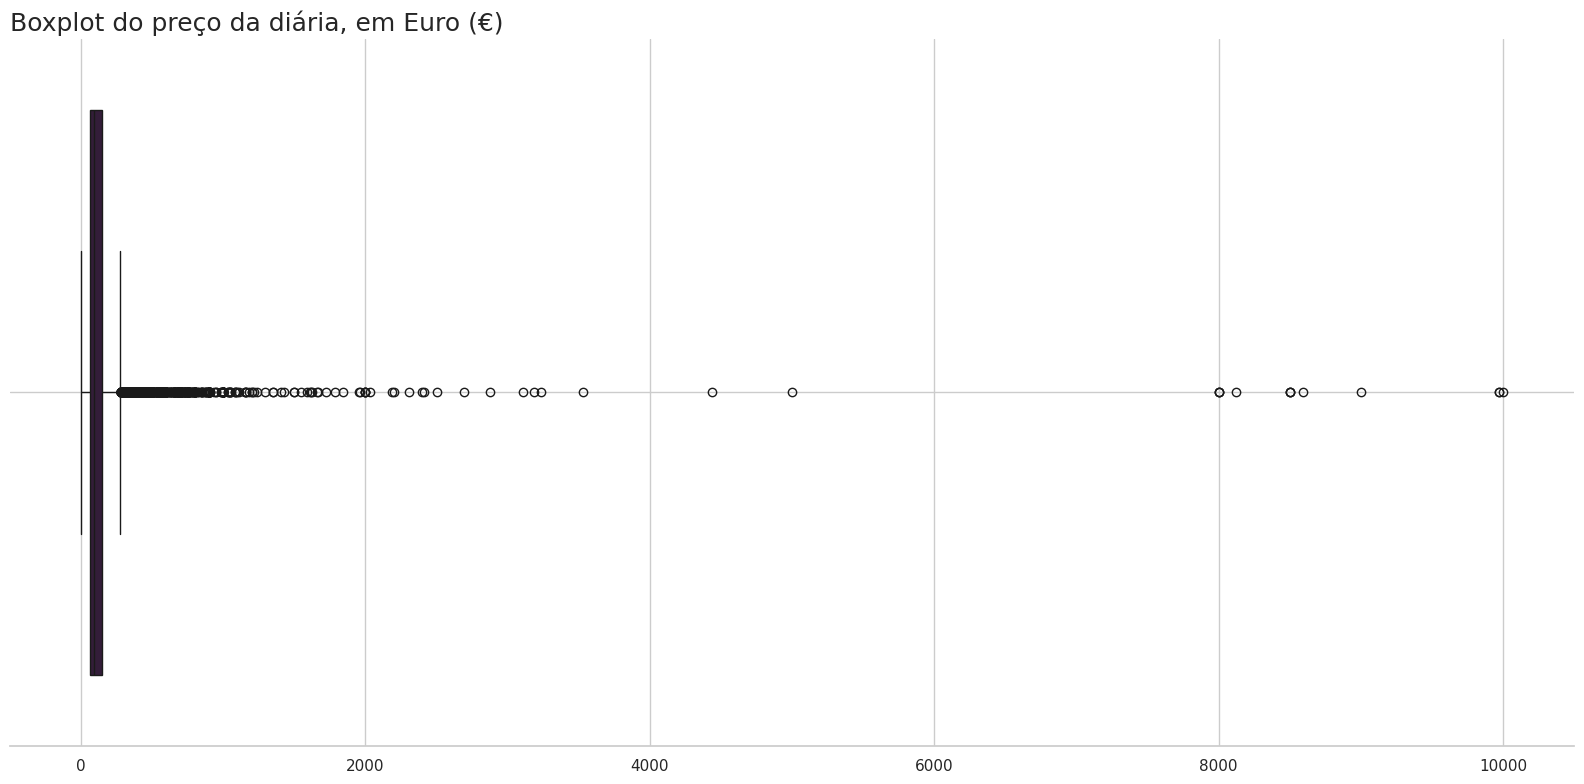

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, x='price')
ax.set_title('Boxplot do preço da diária, em Euro (€)', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

Com o boxplot acima é visível que há muitos dados discrepantes para o preço médio da diária.



### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**


In [47]:
# ver a média da coluna `minimum_nights``
print(f'A média de noites mínimas para locação é: {df.minimum_nights.mean():.2f}')

A média de noites mínimas para locação é: 4.26


Ou seja, em média, os imóveis possuem um requisito mínimo de 4 noites para locação do imóvel.

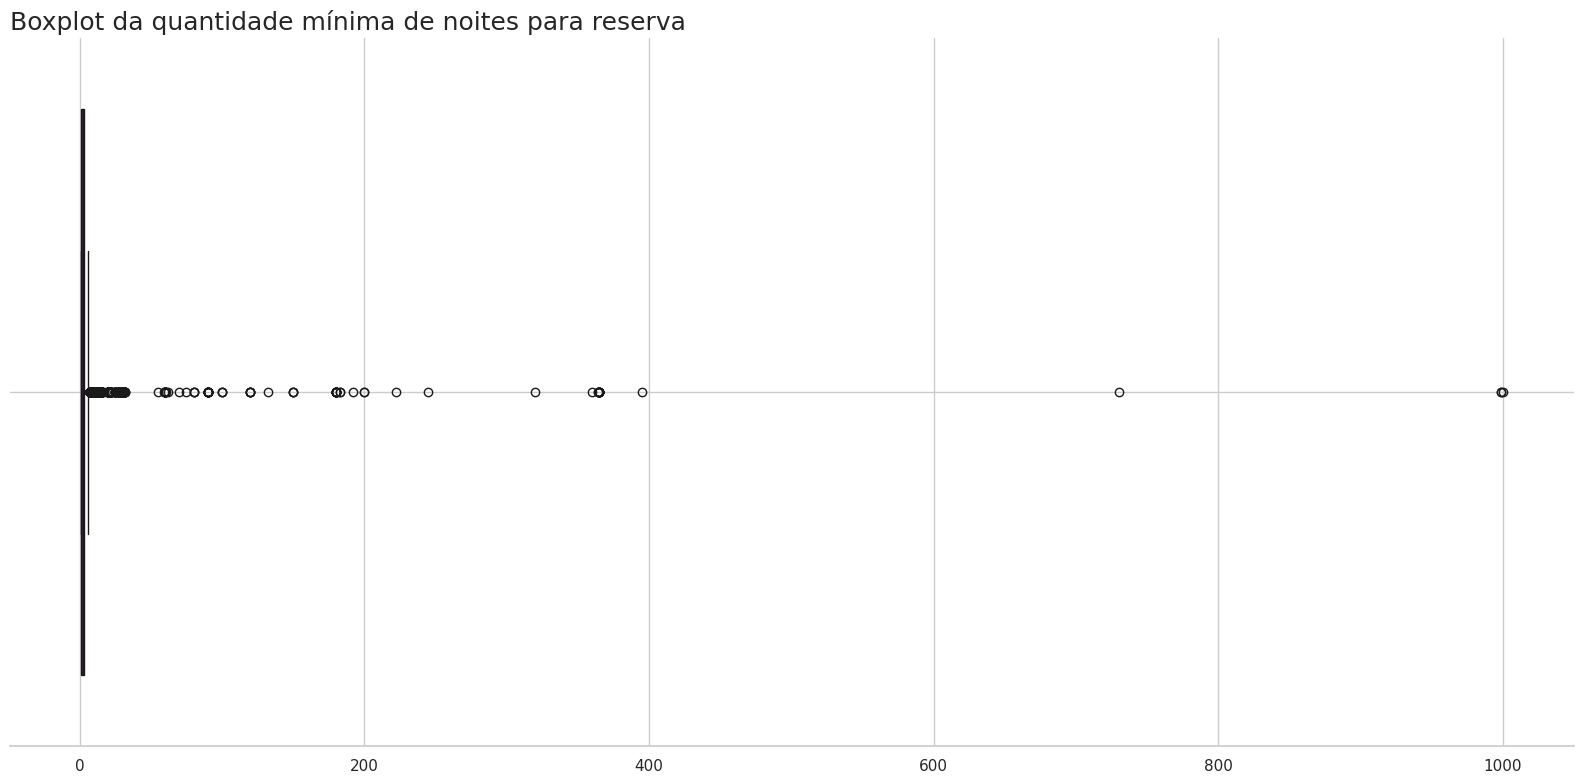

In [48]:
# Gráfico de boxplot para ver a distribuição
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, x='minimum_nights')
ax.set_title('Boxplot da quantidade mínima de noites para reserva', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()

É observado uma quantidade muito estranha de noites mínimas em alguns dados. Como um mês tem 30 dias, é estranho pensar que a quantidade mínima para locação de imóveis seja 100, 200 , 300 ou 1000 dias. Não tem sentido.

Desconsiderando dos dados os imóveis com noite míminas de locação acima de 30 dias, é possível ver o boxplot abaixo.

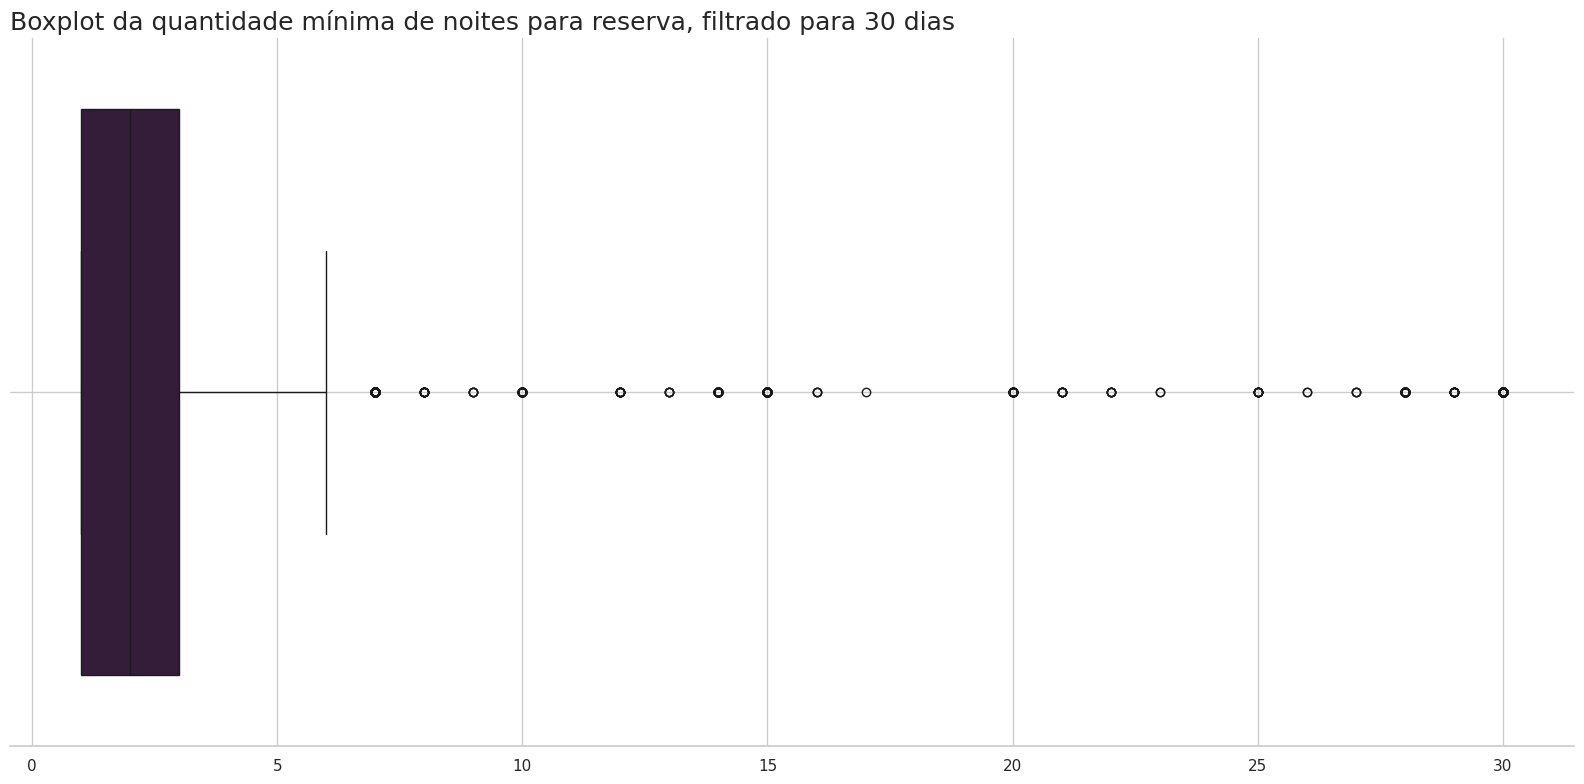

In [49]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df[df.minimum_nights <= 30], x='minimum_nights')
ax.set_title('Boxplot da quantidade mínima de noites para reserva, filtrado para 30 dias', loc='left', fontsize=18)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True)

plt.tight_layout()